In [1]:
# import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dc = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv', index_col=0)

In [3]:
mv = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv', index_col=0)

In [4]:
dc.head(3)

name                             urlslug  \
page_id                                                                   
1422           Batman (Bruce Wayne)        \/wiki\/Batman_(Bruce_Wayne)   
23387         Superman (Clark Kent)       \/wiki\/Superman_(Clark_Kent)   
1458     Green Lantern (Hal Jordan)  \/wiki\/Green_Lantern_(Hal_Jordan)   

                      ID            ALIGN         EYE        HAIR  \
page_id                                                             
1422     Secret Identity  Good Characters   Blue Eyes  Black Hair   
23387    Secret Identity  Good Characters   Blue Eyes  Black Hair   
1458     Secret Identity  Good Characters  Brown Eyes  Brown Hair   

                     SEX  GSM              ALIVE  APPEARANCES  \
page_id                                                         
1422     Male Characters  NaN  Living Characters       3093.0   
23387    Male Characters  NaN  Living Characters       2496.0   
1458     Male Characters  NaN  Living Characters       1565.0   

        FIRST APPEARANCE    YEAR  
page_id                           
1422           1939, May  1939.0  
23387      1986, October  1986.0  
1458       1959, October  1959.0

In [5]:
dc.dtypes

name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [6]:
import re

In [7]:
def find_month(x):
    return str(re.findall("[A-Za-z]+", x))

In [8]:
dc['FIRST APPEARANCE']= dc['FIRST APPEARANCE'].apply(lambda x: find_month(str(x)))

In [9]:
dc['FIRST APPEARANCE'] = dc['FIRST APPEARANCE'].apply(lambda x: x.strip('[]'))

In [10]:
dc['FIRST APPEARANCE'] = dc['FIRST APPEARANCE'].apply(lambda x: x.strip("''"))

In [11]:
mv.head(3)

name  \
page_id                                        
1678               Spider-Man (Peter Parker)   
7139         Captain America (Steven Rogers)   
64786    Wolverine (James \"Logan\" Howlett)   

                                         urlslug               ID  \
page_id                                                             
1678                 \/Spider-Man_(Peter_Parker)  Secret Identity   
7139           \/Captain_America_(Steven_Rogers)  Public Identity   
64786    \/Wolverine_(James_%22Logan%22_Howlett)  Public Identity   

                      ALIGN         EYE        HAIR              SEX  GSM  \
page_id                                                                     
1678        Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
7139        Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
64786    Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   

                     ALIVE  APPEARANCES FIRST APPEARANCE    Year  
page_id                                                           
1678     Living Characters       4043.0           Aug-62  1962.0  
7139     Living Characters       3360.0           Mar-41  1941.0  
64786    Living Characters       3061.0           Oct-74  1974.0

In [12]:
mv['FIRST APPEARANCE'] = mv['FIRST APPEARANCE'].apply(lambda x: str(x).split('-')[0])

In [13]:
mv['FIRST APPEARANCE'].head()

page_id
1678     Aug
7139     Mar
64786    Oct
1868     Mar
2460     Nov
Name: FIRST APPEARANCE, dtype: object

In [14]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6896 entries, 1422 to 150660
Data columns (total 12 columns):
name                6896 non-null object
urlslug             6896 non-null object
ID                  4883 non-null object
ALIGN               6295 non-null object
EYE                 3268 non-null object
HAIR                4622 non-null object
SEX                 6771 non-null object
GSM                 64 non-null object
ALIVE               6893 non-null object
APPEARANCES         6541 non-null float64
FIRST APPEARANCE    6896 non-null object
YEAR                6827 non-null float64
dtypes: float64(2), object(10)
memory usage: 700.4+ KB


In [15]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 1678 to 673702
Data columns (total 12 columns):
name                16376 non-null object
urlslug             16376 non-null object
ID                  12606 non-null object
ALIGN               13564 non-null object
EYE                 6609 non-null object
HAIR                12112 non-null object
SEX                 15522 non-null object
GSM                 90 non-null object
ALIVE               16373 non-null object
APPEARANCES         15280 non-null float64
FIRST APPEARANCE    16376 non-null object
Year                15561 non-null float64
dtypes: float64(2), object(10)
memory usage: 1.6+ MB


In [16]:
#column continuity
mv.rename(columns={'Year':'YEAR'}, inplace=True)

In [17]:
#DC/MV dummies
mv['DC_MV'] = 1
dc['DC_MV'] = 0

In [18]:
#concat df
df = pd.concat([mv, dc], axis = 0)

In [19]:
#rename columns
df.columns = ['NAME', 'URLSLUG', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'GSM', 'ALIVE', 'APPEARANCES', '1st_APPEARANCE', 'YEAR', 'DC_MV']

In [20]:
#resetting index
df.reset_index(inplace=True)

In [21]:
# drop page_id and URLSLUG
df.drop(['page_id','URLSLUG'], axis=1, inplace=True)

In [22]:
# Convert NaN in GSM to 'Straight'
df['GSM'] = df['GSM'].fillna('Straight')

In [23]:
df.shape

(23272, 12)

In [24]:
df.isnull().sum()

NAME                  0
ID                 5783
ALIGN              3413
EYE               13395
HAIR               6538
SEX                 979
GSM                   0
ALIVE                 6
APPEARANCES        1451
1st_APPEARANCE        0
YEAR                884
DC_MV                 0
dtype: int64

In [25]:
df['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan,
       'Reformed Criminals'], dtype=object)

In [26]:
df_nan = df[pd.isnull(df).any(axis = 1)]
df_nan

NAME                ID  \
12            Namor McKenzie (Earth-616)  No Dual Identity   
38        Rogue (Anna Marie) (Earth-616)   Secret Identity   
80               Blaine Colt (Earth-616)   Public Identity   
112            Felicia Hardy (Earth-616)   Public Identity   
114           Monica Rambeau (Earth-616)   Secret Identity   
118        Millicent Collins (Earth-616)   Public Identity   
135              Chili Storm (Earth-616)   Public Identity   
153                 Lockheed (Earth-616)   Secret Identity   
171           Meggan Puceanu (Earth-616)   Secret Identity   
182            Phoenix Force (Earth-616)   Secret Identity   
204             Gloria Grant (Earth-616)  No Dual Identity   
244                  Redwing (Earth-616)   Public Identity   
259            James Bradley (Earth-616)   Secret Identity   
302             Dino Manelli (Earth-616)   Public Identity   
308              Frank Payne (Earth-616)   Secret Identity   
310                    Steel (Earth-616)   Public Identity   
314               Hedy Wolfe (Earth-616)  No Dual Identity   
315            Isadore Cohen (Earth-616)   Public Identity   
321            Marla Madison (Earth-616)  No Dual Identity   
341                Jack Tarr (Earth-616)   Secret Identity   
380                    Prosh (Earth-616)   Secret Identity   
398             Clive Reston (Earth-616)   Public Identity   
403                   Danger (Earth-616)  No Dual Identity   
409                 Eternity (Earth-616)   Secret Identity   
410           William Foster (Earth-616)   Secret Identity   
413           Howard Hanover (Earth-616)   Public Identity   
415    Grand Vizier (Asgard) (Earth-616)   Secret Identity   
428         Clay Quartermain (Earth-616)  No Dual Identity   
436              Ruth Aldine (Earth-616)   Secret Identity   
438          Cyclone (Horse) (Earth-616)   Public Identity   
...                                  ...               ...   
23242           Baron Tyrano (New Earth)   Secret Identity   
23243                 Brains (New Earth)               NaN   
23244                Cracker (New Earth)               NaN   
23245              Hard Head (New Earth)               NaN   
23246                Zig-Zag (New Earth)               NaN   
23247              Dragonfly (New Earth)   Secret Identity   
23248          Carl Bradford (New Earth)               NaN   
23249             Donna Troy (New Earth)   Public Identity   
23250      Bartholomew Magan (New Earth)               NaN   
23251             James Moon (New Earth)               NaN   
23252                 Flash (Wally West)   Secret Identity   
23253           J'onn J'onzz (New Earth)   Public Identity   
23254          Dorothea Tane (New Earth)               NaN   
23255                  Dmane (Earth-Two)               NaN   
23256    Maximillian O'Leary (New Earth)   Public Identity   
23257             Doris Zuel (New Earth)   Secret Identity   
23258              Doris Lee (New Earth)   Public Identity   
23259        Patrick O'Brian (New Earth)   Secret Identity   
23260            Basil Karlo (New Earth)   Secret Identity   
23261             Catwoman (Selina Kyle)   Secret Identity   
23262               Bedivere (New Earth)               NaN   
23263         Herbert Hoover (New Earth)   Public Identity   
23264    William Howard Taft (New Earth)   Public Identity   
23265      Frank Fitzsimmons (New Earth)   Public Identity   
23266         James Garfield (New Earth)   Public Identity   
23267            Nadine West (New Earth)   Public Identity   
23268         Warren Harding (New Earth)   Public Identity   
23269       William Harrison (New Earth)   Public Identity   
23270       William McKinley (New Earth)   Public Identity   
23271                 Mookie (New Earth)   Public Identity   

                    ALIGN            EYE         HAIR                SEX  \
12     Neutral Characters     Green Eyes   Black Hair    Male Characters   
38        Good Characters     Green Eye

In [27]:
df['HAIR'] = df['HAIR'].fillna('None')
df['EYE'] = df['EYE'].fillna('None')

In [28]:
df.dropna(inplace=True)

In [29]:
df.shape

(13832, 12)

In [30]:
df['1st_APPEARANCE'].unique()

array(['Aug', 'Mar', 'Oct', 'Nov', 'May', 'Sep', 'Apr', 'Jul', 'Jun',
       'Jan', 'Feb', 'Dec', 'October', 'February', 'April', 'December',
       'November', 'August', 'July', 'January', 'June', 'March',
       'September', ''], dtype=object)

In [31]:
def con_mon(x):
    if x == 'Jan' or x =='January':
        return 1
    elif x == 'Feb' or x =='February':
        return 2
    elif x=='Mar' or x =='March':
        return 3
    elif x=='Apr' or x =='April':
        return 4
    elif x=='May':
        return 5
    elif x=='Jun' or x =='June':
        return 6
    elif x=='Jul' or x =='July':
        return 7
    elif x=='Aug' or x =='August':
        return 8
    elif x=='Sep' or x =='September':
        return 9
    elif x=='Oct' or x =='October':
        return 10
    elif x=='Nov' or x =='November':
        return 11
    else:
        return 12

In [32]:
con_mon('Nov')

11

In [33]:
df['1st_APPEARANCE']= df['1st_APPEARANCE'].apply(lambda x: con_mon(x))

In [34]:
df['1st_APPEARANCE'].unique()

array([ 8,  3, 10, 11,  5,  9,  4,  7,  6,  1,  2, 12])

In [35]:
df.describe()

APPEARANCES  1st_APPEARANCE          YEAR         DC_MV
count  13832.000000    13832.000000  13832.000000  13832.000000
mean      25.735179        6.692525   1985.113577      0.691802
std      115.176963        3.489361     20.594786      0.461766
min        1.000000        1.000000   1936.000000      0.000000
25%        2.000000        4.000000   1974.000000      0.000000
50%        5.000000        7.000000   1990.000000      1.000000
75%       14.000000       10.000000   2002.000000      1.000000
max     4043.000000       12.000000   2013.000000      1.000000

In [36]:
m_a = pd.DataFrame(df['1st_APPEARANCE'].value_counts())
m_a.reset_index(inplace = True)
m_a.sort_values('index')
m_a.rename(columns = {'index':'Month','1st_APPEARANCE':'Number of New Characters'}, inplace = True)
m_a.sort_values('Month', inplace=True)
m_a.reset_index(drop=True,inplace=True)
m_a

Month  Number of New Characters
0       1                      1203
1       2                       999
2       3                      1178
3       4                       940
4       5                      1018
5       6                      1162
6       7                      1096
7       8                      1293
8       9                      1221
9      10                      1276
10     11                      1103
11     12                      1343

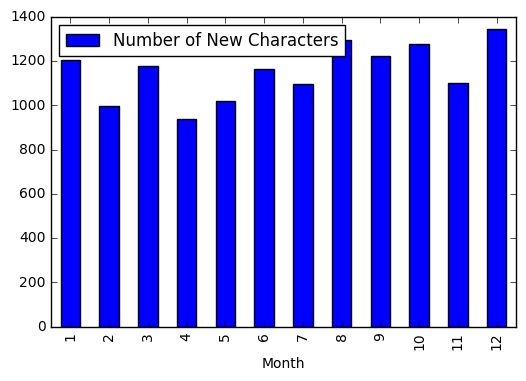

In [37]:
m_a.plot(kind='bar', x='Month', y='Number of New Characters')

In [38]:
pd.pivot_table(df, index=['1st_APPEARANCE','DC_MV'], values=['NAME'], aggfunc=len)

NAME
1st_APPEARANCE DC_MV      
1              0       363
               1       840
2              0       352
               1       647
3              0       327
               1       851
4              0       299
               1       641
5              0       340
               1       678
6              0       358
               1       804
7              0       340
               1       756
8              0       402
               1       891
9              0       356
               1       865
10             0       376
               1       900
11             0       294
               1       809
12             0       456
               1       887

In [49]:
sex_mon = pd.pivot_table(df, index=['YEAR','SEX'], values=['NAME'], aggfunc=len)
sex_mon

NAME
YEAR   SEX                         
1936.0 Female Characters          1
       Male Characters            5
1937.0 Female Characters          1
       Male Characters            2
1938.0 Female Characters          1
       Male Characters            6
1939.0 Female Characters         12
       Male Characters           57
1940.0 Female Characters         38
       Male Characters          200
1941.0 Female Characters         17
       Male Characters          191
1942.0 Female Characters         16
       Male Characters          240
1943.0 Female Characters         13
       Male Characters          174
1944.0 Female Characters         13
       Male Characters          124
1945.0 Female Characters         10
       Male Characters           87
1946.0 Female Characters         11
       Male Characters           78
1947.0 Female Characters         17
       Male Characters           66
1948.0 Female Characters         14
       Male Characters           98
1949.0 Female Characters          6
       Genderfluid Characters     1
       Male Characters           52
1950.0 Female Characters          2
...                             ...
2002.0 Male Characters          178
2003.0 Female Characters         82
       Male Characters          166
2004.0 Female Characters         94
       Male Characters          157
2005.0 Female Characters        103
       Genderfluid Characters     1
       Genderless Characters      2
       Male Characters          199
2006.0 Female Characters        123
       Genderless Characters      1
       Male Characters          277
2007.0 Agender Characters         1
       Female Characters         83
       Genderless Characters      1
       Male Characters          219
2008.0 Female Characters        119
       Male Characters          236
2009.0 Agender Characters         1
       Female Characters        105
       Male Characters          198
2010.0 Female Characters        146
       Male Characters          274
2011.0 Female Characters        103
       Male Characters          262
2012.0 Female Characters         40
       Male Characters          100
2013.0 Agender Characters         5
       Female Characters         36
       Male Characters           78

[185 rows x 1 columns]

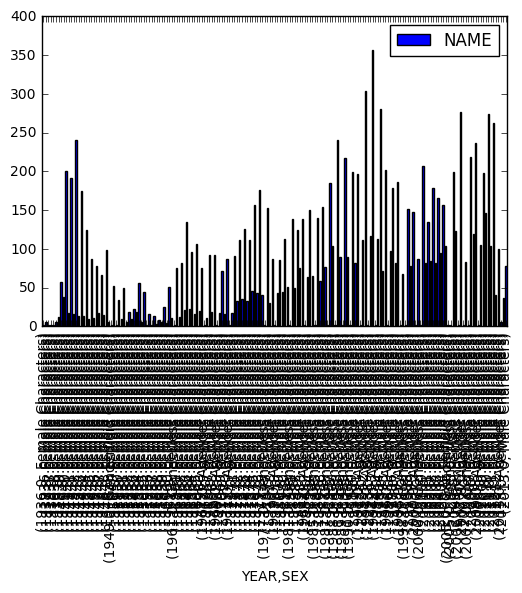

In [50]:
sex_mon.plot(kind='bar')

In [40]:
df.to_csv('comic_char.csv')